In [1]:
import numpy as np
from clean_scripts import *
import scipy
import sys
import pickle

sys.path.append('clean_scripts')
import player_shotInfo2

/Users/geoffreypoon/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
bins, binRange = ([25,18], [[-250,250], [-47.5,312.5]])

hist2d, xedges, yedges, binnumber = scipy.stats.binned_statistic_2d([0], [0], 
                                                                    [0],
                                                                    statistic='sum',
                                                                    bins=bins, 
                                                                    range=binRange)

binDat = (bins, binRange, xedges, yedges, binnumber)

In [3]:
W_norm_att = np.loadtxt('clean_scripts/W_norm_SHOT_ATTEMPTED_FLAG.txt')
H_norm_att = np.loadtxt('clean_scripts/H_norm_SHOT_ATTEMPTED_FLAG.txt')

W_norm_made = np.loadtxt('clean_scripts/W_norm_SHOT_MADE_FLAG.txt')
H_norm_made = np.loadtxt('clean_scripts/H_norm_SHOT_MADE_FLAG.txt')

with open ('clean_scripts/top_players_nameList.pickle', 'rb') as fp:
    top_players_nameList = pickle.load(fp)

In [4]:
player = 'Dwight Howard'
player_index = top_players_nameList.index(player)
print(player_index, top_players_nameList[player_index])

135 Dwight Howard


In [5]:
directory = 'clean_scripts/%s/shotHist_LGCP_phi30_seed546682/'
shot_made_src = (directory + 'lambda_%s.txt') %('SHOT_MADE_FLAG', player)
shot_att_src = (directory + 'lambda_%s.txt') %('SHOT_ATTEMPTED_FLAG', player)

shots_made_map = np.loadtxt(shot_made_src)
shots_att_map = np.loadtxt(shot_att_src)

tot_shots_made = shots_made_map.sum()
tot_shots_att = shots_att_map.sum()
print('Predicted FG%: ', tot_shots_made / tot_shots_att)

Predicted FG%:  0.631795810819


In [6]:
nmf_made_map = np.dot(W_norm_made, H_norm_made)[player_index, :]
nmf_att_map = np.dot(W_norm_att, H_norm_att)[player_index, :]

In [7]:
nmf_FGper_map = (tot_shots_made / tot_shots_att) * (nmf_made_map / nmf_att_map)
nmf_FGper_map

array([  8.92969678e-02,   2.87627887e+00,   4.92970158e-03,
         8.74646808e+00,   1.76230212e-02,   8.71442238e-01,
         8.28164934e-02,   6.63180069e-01,   1.98371378e+00,
         2.99659614e-01,   8.12828272e-02,   4.73778284e-01,
         3.19646154e-01,   3.51781150e-02,   4.64812303e-01,
         4.68276150e+00,   7.09325816e-01,   3.55971253e-01,
         6.26305566e-02,   1.77544888e-02,   3.40969434e-01,
         5.39972934e-02,   3.23367592e-03,   3.87628762e-03,
         8.32636600e-03,   4.89050438e-02,   2.85865033e-03,
         4.02303803e-03,   6.12483210e+00,   3.10518775e-02,
         1.75152892e-01,   6.91717208e-04,   1.90667452e-01,
         2.38533870e+01,   6.01564818e+00,   3.61884026e-01,
         1.88829642e-01,   5.78737039e-01,   4.75222072e+00,
         8.15015359e+00,   3.29781136e-01,   1.83502783e+01,
         3.29657064e-02,   1.98605568e-02,   7.95449471e-04,
         8.20327394e-04,   1.05827703e-03,   2.06039784e-03,
         1.55400764e+00,

In [50]:
sorted_att_prob = np.array(sorted(nmf_att_map, reverse=True))
sorted_att_prob_cumsum = np.cumsum(sorted_att_prob)

filtered_att_prob = sorted_att_prob[1-sorted_att_prob_cumsum >= 0.02]
threshold_att_prob = filtered_att_prob[-1]
print('Threshold probability: ', threshold_att_prob)
print('%d remaining bins out of %d total bins' %(len(filtered_att_prob), len(sorted_att_prob)))

np.vstack((sorted_att_prob, sorted_att_prob_cumsum)).T

Threshold probability:  0.00046710591633
76 remaining bins out of 450 total bins


array([[  4.42247334e-01,   4.42247334e-01],
       [  8.39474466e-02,   5.26194781e-01],
       [  7.39685386e-02,   6.00163319e-01],
       [  4.21990227e-02,   6.42362342e-01],
       [  3.28783646e-02,   6.75240707e-01],
       [  2.90716846e-02,   7.04312391e-01],
       [  2.51123743e-02,   7.29424766e-01],
       [  1.66246152e-02,   7.46049381e-01],
       [  1.57390428e-02,   7.61788424e-01],
       [  1.54465784e-02,   7.77235002e-01],
       [  1.22607528e-02,   7.89495755e-01],
       [  1.21799233e-02,   8.01675678e-01],
       [  1.03822140e-02,   8.12057892e-01],
       [  9.80425869e-03,   8.21862151e-01],
       [  9.79983951e-03,   8.31661990e-01],
       [  7.36173938e-03,   8.39023730e-01],
       [  7.35256477e-03,   8.46376295e-01],
       [  7.10777791e-03,   8.53484073e-01],
       [  7.10067538e-03,   8.60584748e-01],
       [  6.37658748e-03,   8.66961335e-01],
       [  6.13606293e-03,   8.73097398e-01],
       [  6.13345134e-03,   8.79230850e-01],
       [  

In [51]:
filtered_nmf_FGper_map = np.copy(nmf_FGper_map)
filtered_nmf_FGper_map[nmf_att_map < threshold_att_prob] = 0.
sorted(filtered_nmf_FGper_map, reverse=True)[:10]

[0.82256006575680052,
 0.79257186890991249,
 0.74178790712756126,
 0.71864358525441185,
 0.66231921184991038,
 0.65495558612463178,
 0.63826783417791066,
 0.61429072336689283,
 0.6130291826814197,
 0.57181292216065716]

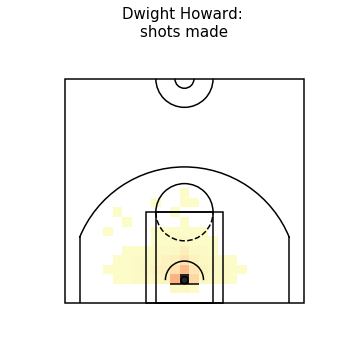

In [52]:
filtered_nmf_made_map = np.copy(nmf_att_map)
filtered_nmf_made_map[nmf_att_map < threshold_att_prob] = 0.

player_shotInfo2.plot_shotHist(filtered_nmf_made_map, player, binDat, 
                               'shotMade_map_%s.png'%player, 
                               title='\nshots made', norm_Opt='linear', 
                               plot_size=(5,5))

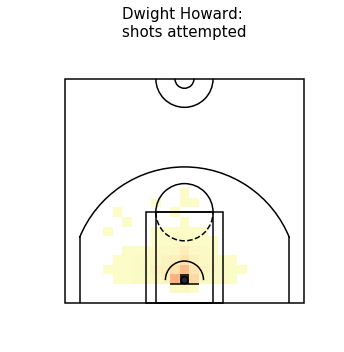

In [53]:
filtered_nmf_att_map = np.copy(nmf_att_map)
filtered_nmf_att_map[nmf_att_map < threshold_att_prob] = 0.

player_shotInfo2.plot_shotHist(filtered_nmf_att_map, player, binDat, 
                               'shotAtt_map_%s.png'%player, 
                               title='\nshots attempted', norm_Opt='linear', 
                               plot_size=(5,5))

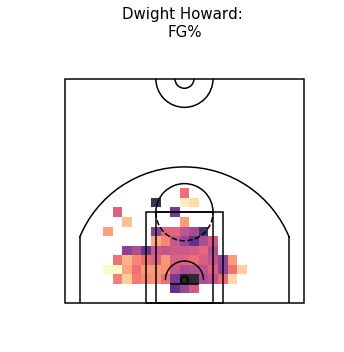

In [54]:
filtered_nmf_FGper_map = np.copy(nmf_FGper_map)
filtered_nmf_FGper_map[nmf_att_map < threshold_att_prob] = 0.

player_shotInfo2.plot_shotHist(filtered_nmf_FGper_map, player, binDat, 
                               'FGper_map_%s.png'%player, 
                               title='\nFG%', norm_Opt='linear', 
                               plot_size=(5,5))

In [55]:
scipy.stats.describe(nmf_att_map)

DescribeResult(nobs=450, minmax=(4.3753538980103368e-09, 0.44224733429353058), mean=0.0022222059476631369, variance=0.00047264915432661335, skewness=18.714023409039147, kurtosis=372.34063500856564)

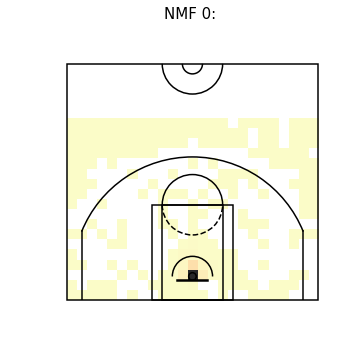

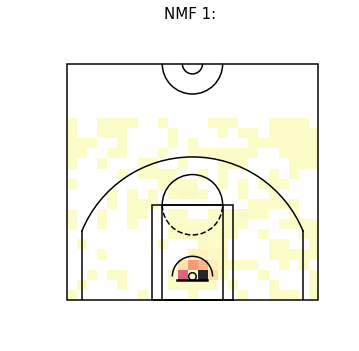

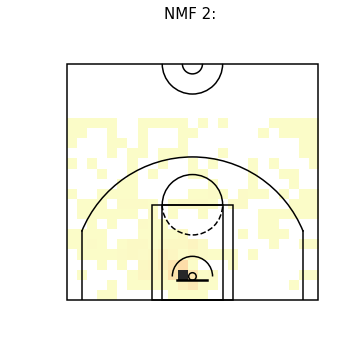

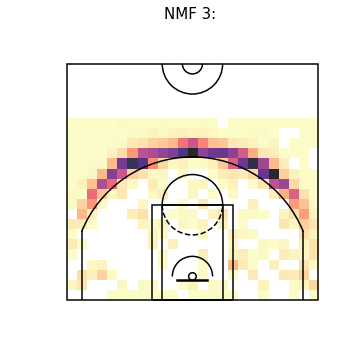

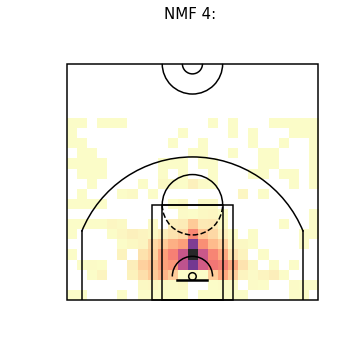

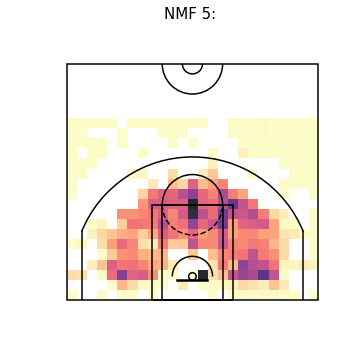

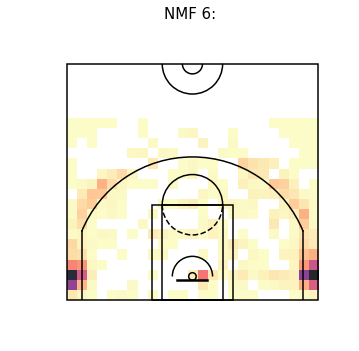

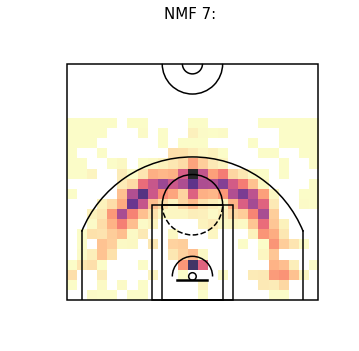

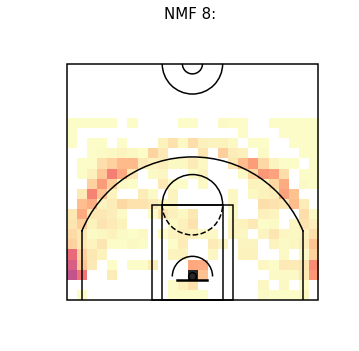

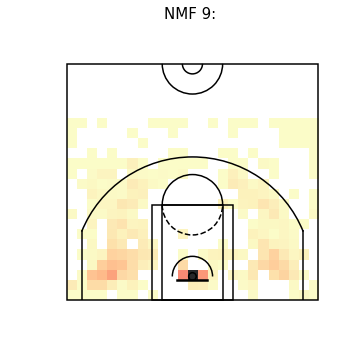

In [49]:
n_features_made = H_norm_made.shape[0]
for i in range(n_features_made):
    player_shotInfo2.plot_shotHist(H_norm_made[i,:], 
                                   'NMF %d'%i, binDat, 
                                   'shotMade_basisVec_%d.png'%i, 
                                   title='', norm_Opt='linear', 
                                   plot_size=(5,5))

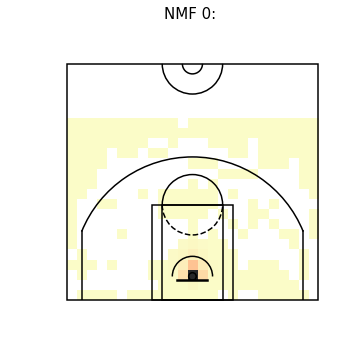

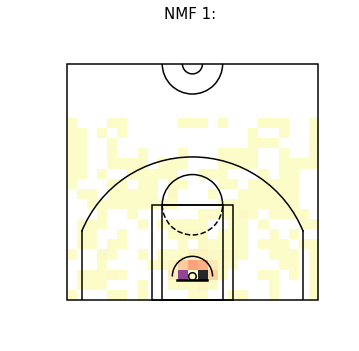

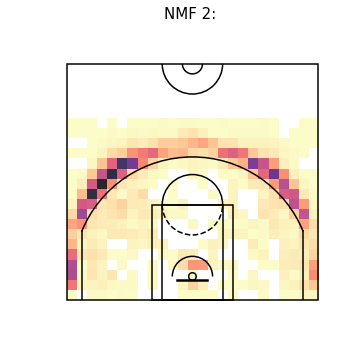

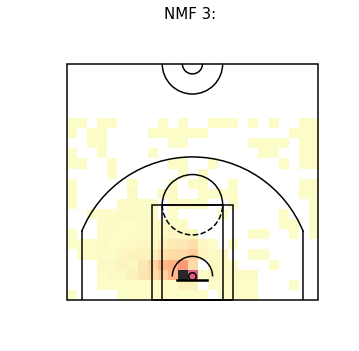

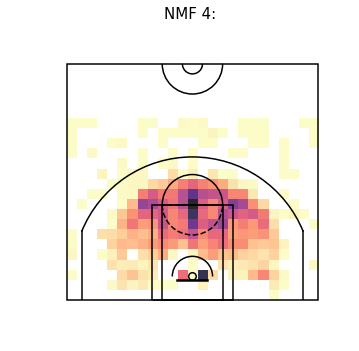

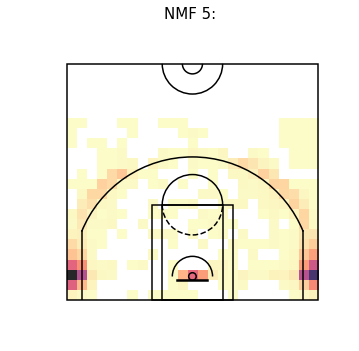

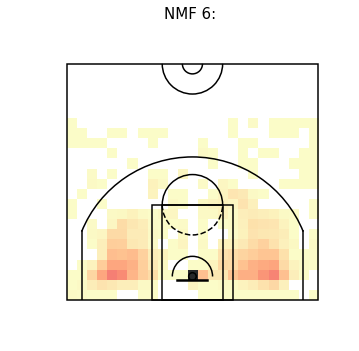

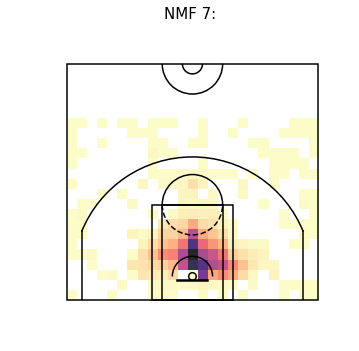

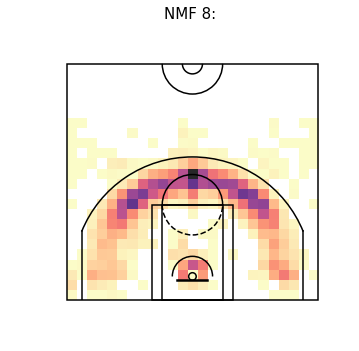

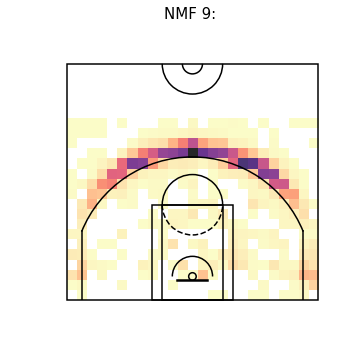

In [15]:
n_features_att = H_norm_att.shape[0]
for i in range(n_features_att):
    player_shotInfo2.plot_shotHist(H_norm_att[i,:], 
                                   'NMF %d'%i, binDat, 
                                   'shotMade_basisVec_%d.png'%i, 
                                   title='', norm_Opt='linear', 
                                   plot_size=(5,5))